# **Contenido**

1. Introducción
2. Definición del Modelo Arima
3. Caso de estudio: Forecasting Precio del Bitcoin
4. Cargando librerias y datos
5. Análisis Exploratorio de Datos
6. Modelando con StatsForecast
7. Evaluar el rendimiento del modelo.
8. Conclusion

# Tipos de análisis de series temporales

Algunos de los modelos de análisis de series de tiempo incluyen:

**1 Clasificación**: Identifica y asigna categorías a los datos.

**2 Ajuste de curvas**: Traza datos en una curva para investigar las relaciones entre las variables en los datos.

**3 Análisis descriptivo**: Se identifican patrones en los datos de series temporales, como tendencias, ciclos y variaciones estacionales.

**4 Análisis explicativo**: Intenta comprender los datos y las relaciones entre ellos y causa y efecto.

**5 Segmentación**: divide los datos en segmentos para revelar las propiedades subyacentes de los datos de origen.


# Componentes de una serie temporal

1. **Tendencia**: la tendencia muestra una dirección general de los datos de la serie temporal durante un largo período de tiempo. Una tendencia puede ser creciente (hacia arriba), decreciente (hacia abajo) u horizontal (estacionaria).
1. **Estacionalidad**: el componente de estacionalidad muestra una tendencia que se repite con respecto al momento, la dirección y la magnitud. Algunos ejemplos incluyen un aumento en el consumo de agua en verano debido a las condiciones climáticas cálidas.
1. **Ruido**: valores atípicos o faltantes
1. **Componente cíclico**: son las tendencias que no se repiten durante un período de tiempo determinado. Un ciclo se refiere al período de altibajos, auges y barrios marginales de una serie temporal, que se observa principalmente en los ciclos económicos. Estos ciclos no presentan una variación estacional, pero generalmente ocurren durante un período de 3 a 12 años, dependiendo de la naturaleza de la serie temporal.
1. **Variación irregular**: son las fluctuaciones en los datos de la serie temporal que se vuelven evidentes cuando se eliminan las variaciones cíclicas y de tendencia. Estas variaciones son impredecibles, erráticas y pueden ser aleatorias o no.
1. **Descomposición ETS**: la descomposición ETS se utiliza para separar diferentes componentes de una serie temporal. El término ETS significa Error, Tendencia y Estacionalidad.


<center><img src="https://editor.analyticsvidhya.com/uploads/89638Everything%20in%20a%20single%20picture_2.jpg" width="800" height="500"></center>

# Caso de Estudio: Pronóstico del precio del Bitcoin

Introducción:
El Bitcoin, una criptomoneda descentralizada y ampliamente reconocida, ha experimentado una volatilidad significativa en su precio a lo largo de los años. El forecasting o pronóstico del precio del Bitcoin se ha convertido en un área de interés para inversores, analistas y entusiastas de las criptomonedas. En este caso de estudio, exploraremos diferentes técnicas de forecasting utilizadas para predecir el precio futuro del Bitcoin y cómo pueden ayudar en la toma de decisiones financieras.

Objetivos:
- Analizar y comprender los datos históricos del precio del Bitcoin.
- Aplicar diferentes técnicas de forecasting para predecir el precio futuro del Bitcoin.
- Evaluar la precisión y eficacia de los modelos de forecasting utilizados.
- Utilizar los resultados del pronóstico para tomar decisiones financieras informadas.

Metodología:
1. Recopilación de datos: Obtener datos históricos del precio del Bitcoin a través de fuentes confiables, como exchanges de criptomonedas o proveedores de datos financieros.
2. Análisis exploratorio de datos: Examinar los datos para identificar tendencias, estacionalidad y patrones en el precio del Bitcoin a lo largo del tiempo.
3. Preparación de datos: Realizar la limpieza y transformación de los datos, asegurándose de que estén en un formato adecuado para su análisis y modelado.
4. Selección de técnicas de forecasting: Identificar y seleccionar técnicas de forecasting adecuadas para el pronóstico del precio del Bitcoin. Algunas técnicas comunes incluyen modelos de series temporales (ARIMA, SARIMA), modelos de regresión, redes neuronales, entre otros.
5. División de datos: Dividir los datos en conjuntos de entrenamiento y prueba, donde el conjunto de entrenamiento se utiliza para ajustar el modelo y el conjunto de prueba se utiliza para evaluar su rendimiento.
6. Construcción del modelo: Implementar el modelo de forecasting seleccionado utilizando el conjunto de entrenamiento y ajustar sus parámetros según sea necesario.
7. Evaluación del modelo: Evaluar el rendimiento del modelo utilizando métricas apropiadas, como el error cuadrático medio (MSE), el error absoluto medio (MAE) o el coeficiente de determinación (R^2).
8. Pronóstico del precio del Bitcoin: Utilizar el modelo entrenado para pronosticar el precio futuro del Bitcoin en el conjunto de prueba.
9. Validación del pronóstico: Comparar las predicciones del modelo con los valores reales del conjunto de prueba para evaluar la precisión del pronóstico.
10. Toma de decisiones: Utilizar los resultados del pronóstico para tomar decisiones financieras informadas, como la compra o venta de Bitcoin, la gestión de riesgos o la planificación de inversiones.

Resultados esperados:
Se espera obtener un modelo de forecasting preciso y confiable para predecir el precio futuro del Bitcoin. El análisis de los resultados permitirá a los inversores y analistas tomar decisiones financieras más informadas, como la identificación de oportunidades de inversión, la gestión de riesgos y la planificación estratégica.

Conclusiones:
El forecasting del precio del Bitcoin es un desafío debido a la volatilidad inherente de las criptomonedas. Sin embargo, mediante el uso de técnicas de forecasting adecuadas y un análisis cuidadoso de los datos históricos, es posible obtener pronósticos útiles y significativos. Es importante tener en cuenta que el forecasting no garantiza resultados precisos en todos los casos, y es necesario actualizar y ajustar los modelos a medida que nuevos datos estén disponibles. El pronóstico del precio del Bitcoin puede ser una herramienta valiosa para los inversores y analistas, pero debe utilizarse junto con una comprensión sólida de los fundamentos y factores que influyen en el mercado de las criptomonedas.

In [411]:
# pip install klib

# Cargamos las librerias

In [412]:
# importing libraries

import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import klib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Download stock
# ==============================================================================
import yfinance as yf

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [413]:
# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# Cargando los datos

Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

! pip install yfinance

In [414]:
# df = yf.download('AAPL', 
#                       start='2015-01-01', 
#                       end='2024-06-14', 
#                       progress=False, interval='1d')

# df

In [415]:
df = yf.download('BTC', 
                      start='2019-01-01', 
                      end='2024-06-14', 
                      progress=False, interval='1d')

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,95.702156,0
2020-10-02,100.000000,100.000000,100.000000,100.000000,95.702156,0
2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725
2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730850,10080
2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625587,6350
...,...,...,...,...,...,...
2024-06-07,91.879997,91.879997,91.679298,91.679298,91.679298,787
2024-06-10,91.584999,91.584999,91.584999,91.584999,91.584999,10
2024-06-11,91.739899,91.800003,91.620003,91.785004,91.785004,1071


In [416]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,95.702156,0
2020-10-02,100.000000,100.000000,100.000000,100.000000,95.702156,0
2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725
2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730850,10080
2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625587,6350


Antes de comenzar con la parte de visualización, comprendamos el significado de estos términos característicos:

* **Open** -> Open significa el precio al que una acción comenzó a cotizar cuando sonó la campana de apertura.
* **Close** -> Close se refiere al precio de una acción individual cuando la bolsa de valores cerró sus operaciones por el día. Representa la última orden de compra-venta ejecutada entre dos traders.
* **High** -> The high es el precio más alto al que se negocia una acción durante un período.
* **Low** -> The low es el precio más bajo del periodo.
* **Adj Close** -> Los valores ajustados tienen en cuenta acciones corporativas como dividendos, divisiones de acciones y nuevas emisiones de acciones.
* **Volume** -> Volume es El número total de acciones negociadas en un período de seguridad.

**¿Por qué es importante el precio de cierre de una acción?**

* El precio de cierre de las acciones determina el rendimiento de una acción durante el día.
* **Al investigar datos históricos de precios de acciones**, las instituciones financieras, los reguladores y los inversores individuales **utilizan el precio de cierre como medida estándar del valor de las acciones en una fecha específica**. Por ejemplo, el cierre de una acción el 31 de diciembre de 2019 fue el precio de cierre de ese día y esa semana, mes, trimestre y año.
* La diferencia entre la apertura y el cierre de las acciones dividida por la apertura es el **retorno o rendimiento de la acción en términos porcentuales**.

In [417]:
df.tail(5)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-07,91.879997,91.879997,91.679298,91.679298,91.679298,787
2024-06-10,91.584999,91.584999,91.584999,91.584999,91.584999,10
2024-06-11,91.739899,91.800003,91.620003,91.785004,91.785004,1071
2024-06-12,92.389999,92.389999,92.092499,92.092499,92.092499,6948
2024-06-13,92.440002,92.459900,92.349998,92.413002,92.413002,2652


In [418]:
# Here u notice that our date is of Object datatype so well convert it to datetime format
#df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d" )

In [419]:
# Checking the data types of  columns
# checking the count of null values -> 0 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 931 entries, 2020-10-01 to 2024-06-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       931 non-null    float64
 1   High       931 non-null    float64
 2   Low        931 non-null    float64
 3   Close      931 non-null    float64
 4   Adj Close  931 non-null    float64
 5   Volume     931 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 50.9 KB


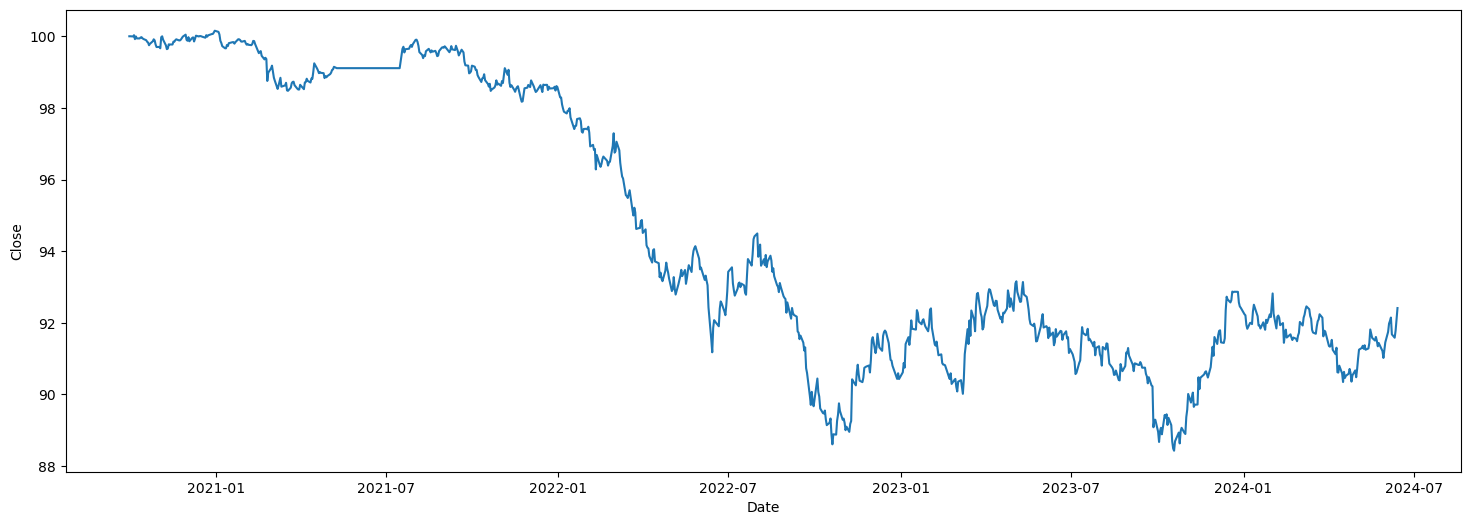

In [420]:
plt.figure(figsize = (18,6))
sns.lineplot(data = df, x = df.index, y = df["Close"]);

In [421]:
data = df[df['Volume']>0]
data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725
2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730850,10080
2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625587,6350


# Visualizing the Stock price Dataset 📈

<AxesSubplot:xlabel='Date', ylabel='Close'>

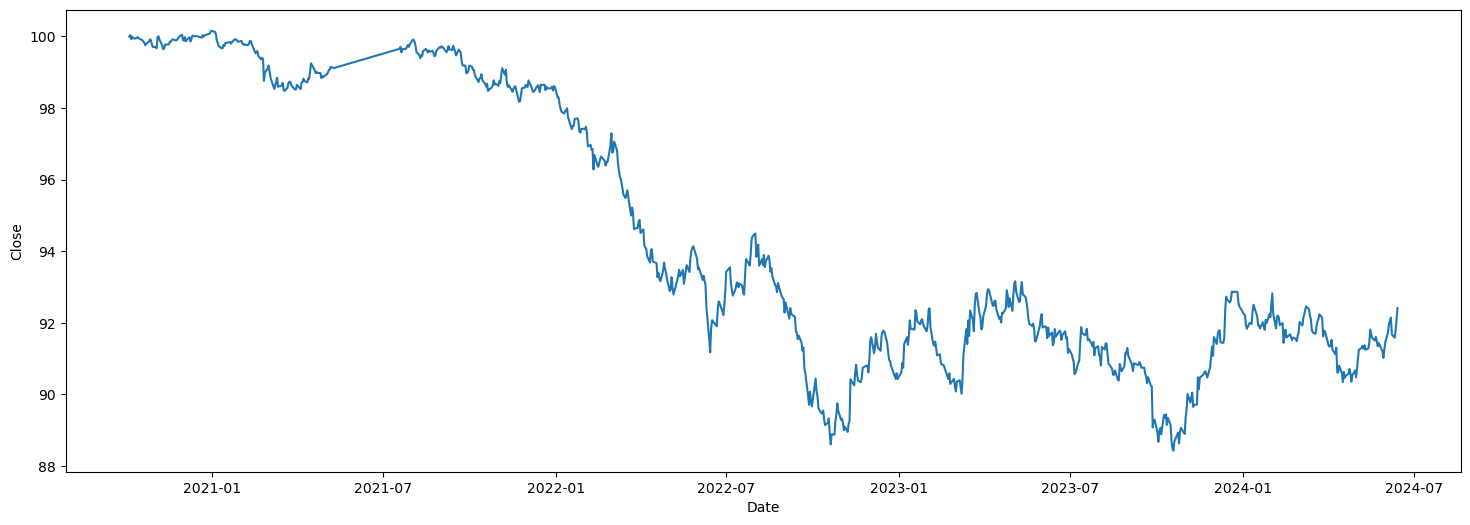

In [422]:
plt.figure(figsize = (18,6))
sns.lineplot(data = data, x = data.index, y = 'Close')

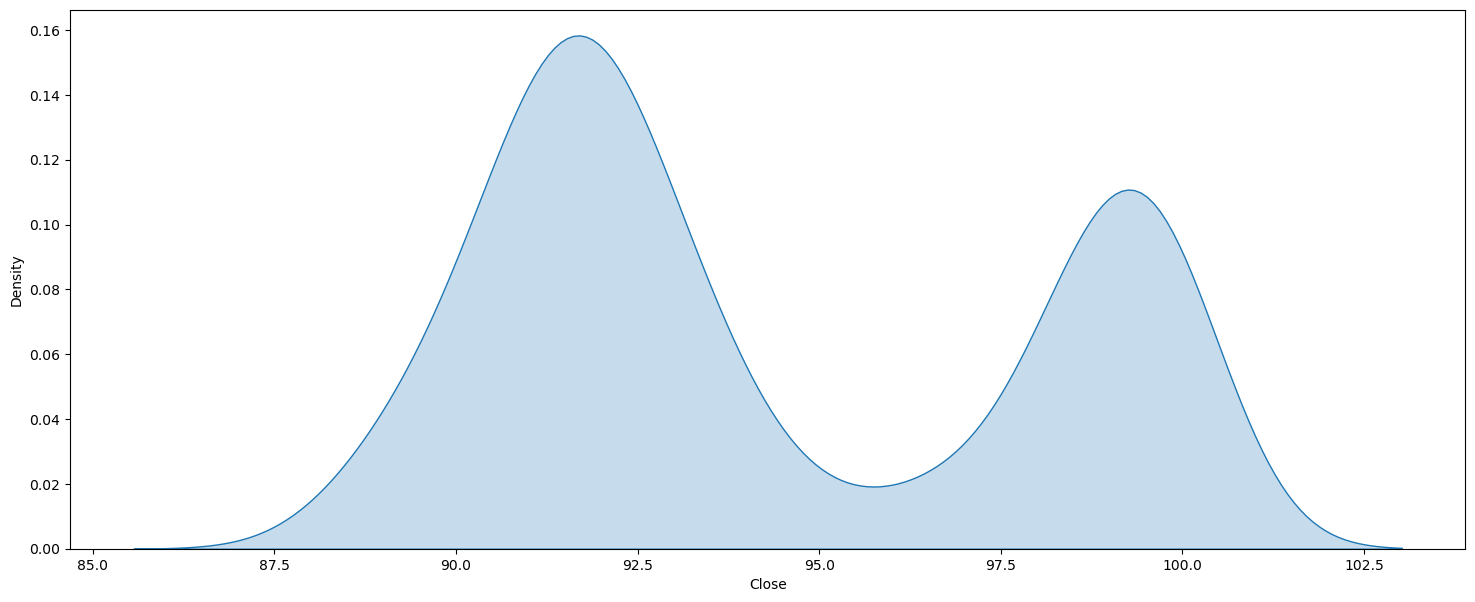

In [423]:
sns.kdeplot(data['Close'], fill = True);

<AxesSubplot:xlabel='Close', ylabel='Density'>

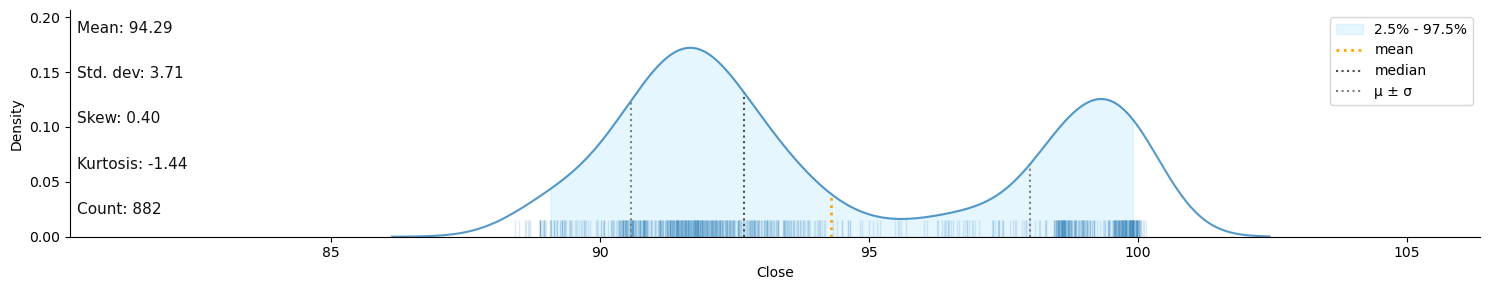

In [424]:
klib.dist_plot(data["Close"]) 

In [425]:
# data['Returns1'] = data['Close'].pct_change()

In [426]:
# Adding Return Column

data['Return'] = (data['Adj Close']-data['Open'])/data['Open']

# making a copy for later use
stocks_data = data.copy()
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725,-0.043313
1,2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730850,10080,-0.042787
2,2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625587,6350,-0.043266
3,2020-10-08,99.989998,99.995003,99.971703,99.995003,95.697372,650,-0.042931
4,2020-10-09,99.970001,99.980003,99.940002,99.940002,95.644730,1820,-0.043266


Un retorno de -0.043313 significa que ha habido una disminución o pérdida en el valor del activo o instrumento financiero en cuestión. El valor numérico negativo indica que el retorno es negativo, lo que implica que el valor final es inferior al valor inicial.

En el ejemplo proporcionado, un retorno de -0.043313 significa que el precio de cierre del activo ha disminuido aproximadamente en un 4.3323% en comparación con el precio de apertura o inicial. Esto indica que, durante el período de tiempo considerado, el activo ha experimentado una caída en su valor.

Los retornos negativos pueden indicar una variedad de situaciones, como una tendencia bajista en el mercado, una disminución en la demanda del activo o factores negativos que afectan el desempeño del activo en cuestión. Los inversores y analistas utilizan los retornos negativos para evaluar el rendimiento pasado y realizar proyecciones o decisiones futuras en función de esta información.

Es importante considerar el contexto y el marco temporal al interpretar los retornos. Un solo retorno negativo no proporciona una imagen completa del rendimiento del activo a largo plazo. Es necesario analizar los retornos históricos y compararlos con otros factores relevantes para obtener una evaluación más precisa del desempeño del activo.

Como se mencionó anteriormente, "al investigar datos históricos de precios de acciones, utilice el precio de cierre como medida estándar del valor de las acciones".

Así que intentemos visualizar el precio de cierre del conjunto de datos usando plotly

In [427]:
fig = px.line(data,x="Date",y="Close",title="Closing Price: Range Slider and Selectors")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))

In [428]:
# Visualizing Returns

fig = px.line(data,x="Date",y="Return",title="Returns : Range Slider and Selectors")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))

## Candlestick Plots

* Pregúntele a cualquier persona en el ámbito financiero, la mejor manera de representar una acción en términos de un gráfico sería un gráfico de velas japonesas.

* Estos son esencialmente pequeños diagramas de caja que representan la apertura, el máximo, el cierre y el mínimo de una acción en un período de tiempo determinado.

* Una vela roja es una vela bajista (Precio de cierre < Precio de apertura) y una vela verde es una vela alcista (Precio de cierre > Precio de apertura)

![](https://images.contentstack.io/v3/assets/blt38dd155f8beb7337/blt7c01ee0ced45a82c/62284bd13b0a2616b0dfb389/Bearish_and_Bullish_Candlestick.jpg)

In [429]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                    open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.show(figsize = (18,6))

## OHLC Plots 📈📉

* De manera similar a una vela, también puede trazar gráficos OHLC que esencialmente ofrecen el mismo propósito de trazar la apertura, el máximo, el mínimo y el cierre de una acción, pero con una estética diferente.
* Además, al igual que matplotlib, incluso plotly tiene una función make_subplots que se puede usar para combinar gráficos, en nuestros casos el gráfico OHLC con el Volumen.

<center><img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg" width="800" height="500"></center>

In [430]:
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=data.Date, open=data.Open, high=data.High, low=data.Low, close=data.Close, name='Price'),row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

## Shifting and lags

Podemos cambiar el índice según el número deseado de períodos con una frecuencia de tiempo opcional. Esto es útil al comparar la serie temporal con un pasado de sí misma.

In [431]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725,-0.043313
1,2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730850,10080,-0.042787
2,2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625587,6350,-0.043266
3,2020-10-08,99.989998,99.995003,99.971703,99.995003,95.697372,650,-0.042931
4,2020-10-09,99.970001,99.980003,99.940002,99.940002,95.644730,1820,-0.043266


In [432]:
fig = go.Figure()
#data['Close_M'] = data["Close"]
data['Lag_Close_M'] = data['Close'].shift(10)
fig.add_trace(go.Scatter(x=data.Date,y=data.Close,name='Close'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Lag_Close_M,name='Lag_Close_M'))
fig.show()

In [433]:
fig = go.Figure()
#data['Volume_M'] = data["Volume"]
data['Lag_Volume_M'] = data['Volume'].shift(10)
fig.add_trace(go.Scatter(x=data.Date,y=data.Volume,name='Volume'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Lag_Volume_M,name='Lag_Volume_M'))
fig.show()

In [434]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Lag_Close_M,Lag_Volume_M
0,2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725,-0.043313,NaN,NaN
1,2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730850,10080,-0.042787,NaN,NaN
2,2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625587,6350,-0.043266,NaN,NaN
3,2020-10-08,99.989998,99.995003,99.971703,99.995003,95.697372,650,-0.042931,NaN,NaN
4,2020-10-09,99.970001,99.980003,99.940002,99.940002,95.644730,1820,-0.043266,NaN,NaN


# Análisis de datos de series temporales: remuestreo

* En las series temporales, la coherencia de los datos es de suma importancia; el remuestreo garantiza que los datos se distribuyan con una frecuencia constante.
* El remuestreo también puede proporcionar una percepción diferente al observar los datos.
* En otras palabras, puede agregar información adicional sobre los datos según la frecuencia de remuestreo.

**Muestreo ascendente**: la serie temporal se vuelve a muestrear de baja frecuencia a alta frecuencia (frecuencia mensual a diaria). Implica completar o interpolar datos faltantes.

**Reducción de resolución**: la serie temporal se vuelve a muestrear de alta frecuencia a baja frecuencia (frecuencia semanal a mensual). Implica la agregación de datos existentes.

Reference -> [How to use Resample in Pandas to enhance your time series data analysis](https://towardsdatascience.com/time-series-data-analysis-resample-1ff2224edec9)

In [435]:
# Aquí haremos una reducción de resolución -> reducción de resolución ex: - de meses a años (disminuyendo puntos de datos)
# Donde A representa "frecuencia de fin de año"
# max es la función agregadora
data = data.set_index("Date")
data.resample(rule='M').max().tail(5)

# Here we got the max feature values of each year for the last 5 years

,Open,High,Low,Close,Adj Close,Volume,Return,Lag_Close_M,Lag_Volume_M
Date,,,,,,,,,
2024-02-29,92.730003,92.944801,92.730003,92.820801,92.258186,13928.0,-0.005088,92.820801,13928.0
2024-03-31,92.409599,92.500000,92.379997,92.459801,91.899376,10197.0,0.001318,92.459801,4006.0
2024-04-30,91.385002,91.525398,91.366699,91.525398,91.525398,9183.0,0.001536,92.239601,10197.0
2024-05-31,91.814796,91.814796,91.814796,91.814796,91.814796,32762.0,0.002464,91.814796,9183.0
2024-06-30,92.440002,92.459900,92.349998,92.413002,92.413002,6948.0,0.000653,91.606598,32762.0


<AxesSubplot:xlabel='Date'>

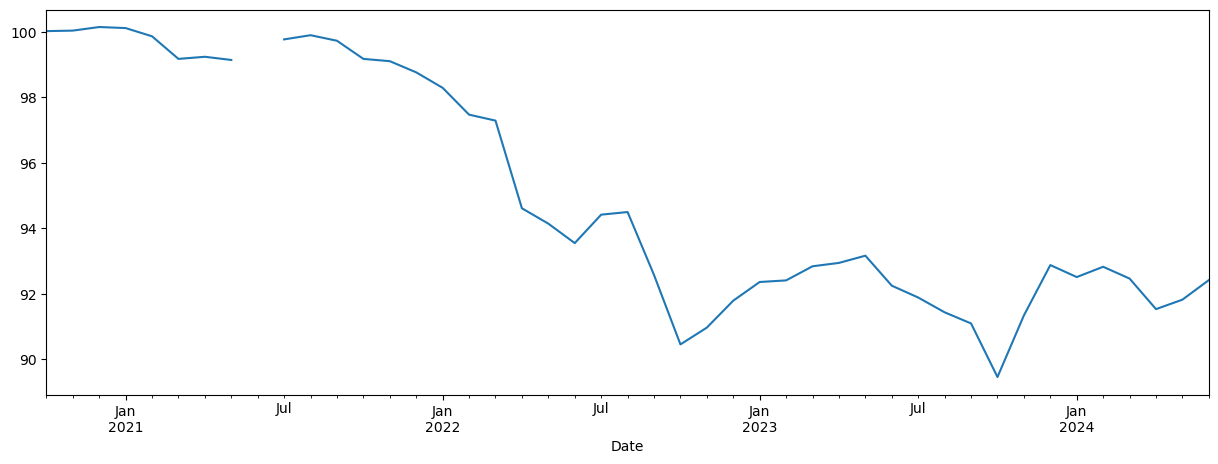

In [436]:
# Let's suppose if we want to visualize the max Close values of all years

data['Close'].resample(rule='ME').max().plot(figsize=(15,5))

We can also explore other rules according to our necessities.from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Technical Indicators 🔼🔽 
#### Los indicadores son la mejor manera de visualizar un patrón bursátil.

En este contexto nos vamos a centrar en una lista de indicadores técnicos que son ampliamente utilizados por profesionales y académicos, y aquellos que creo que son más beneficiosos en el comercio automatizado. La lista de indicadores son:

1. Simple Moving Average (Fast and Slow)

2. Exponential Moving Average (Fast and Slow)

3. Relative Strength Index (RSI)

4. Moving Average Convergence Divergence (MACD)

## Simple Moving Average

* La media móvil simple es uno de los indicadores técnicos más comunes.
* SMA calcula el promedio de los precios durante un intervalo de tiempo determinado y se utiliza para determinar la tendencia de la acción.
* Como se definió anteriormente, crearé un SMA lento (SMA_15) y un SMA rápido (SMA_5).
* Aquí estos valores numéricos representan el intervalo de tiempo como 15 días.

In [437]:
data

,Open,High,Low,Close,Adj Close,Volume,Return,Lag_Close_M,Lag_Volume_M
Date,,,,,,,,,
2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725,-0.043313,NaN,NaN
2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730850,10080,-0.042787,NaN,NaN
2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625587,6350,-0.043266,NaN,NaN
2020-10-08,99.989998,99.995003,99.971703,99.995003,95.697372,650,-0.042931,NaN,NaN
2020-10-09,99.970001,99.980003,99.940002,99.940002,95.644730,1820,-0.043266,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-06-07,91.879997,91.879997,91.679298,91.679298,91.679298,787,-0.002184,91.345398,941.0
2024-06-10,91.584999,91.584999,91.584999,91.584999,91.584999,10,0.000000,91.437698,20122.0
2024-06-11,91.739899,91.800003,91.620003,91.785004,91.785004,1071,0.000492,91.212799,32762.0


In [438]:
#SMA
data['SMA_5'] = data['Close'].rolling(window = 5).mean().shift()
data['SMA_15'] = data['Close'].rolling(window = 15).mean().shift()


# If u want to visualize between a range of specific dates u can do it like -> fig = go.Figure(layout_xaxis_range=['2019-06-04','2020-01-02'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index,y=data.SMA_5,name='SMA_5'))
fig.add_trace(go.Scatter(x=data.index,y=data.SMA_15,name='SMA_15'))
fig.add_trace(go.Scatter(x=data.index,y=data.Close,name='Close', opacity=0.3))
fig.show()

Aunque SMA es bastante común, contiene un sesgo de dar igual peso a cada valor en el pasado.

## Exponential Moving Average (EMA)

* Una media móvil exponencial (EMA) es un tipo de media móvil (MA) que otorga un mayor peso e importancia a los puntos de datos más recientes.

* Básicamente, lo que significa es que los datos más recientes sobre el precio de las acciones tienen un mayor peso/importancia en el precio que los de los días más antiguos.

In [439]:
#EMA

data['EMA_5'] = data['Close'].ewm(5).mean().shift()
data['EMA_15'] = data['Close'].ewm(15).mean().shift()

# If u want to visualize between a range of specific dates u can do it like -> fig = go.Figure(layout_xaxis_range=['2019-06-04','2020-01-02'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index,y=data.EMA_5,name='EMA_5'))
fig.add_trace(go.Scatter(x=data.index,y=data.EMA_15,name='EMA_15'))
fig.add_trace(go.Scatter(x=data.index,y=data.Close,name='Close', opacity=0.3))
fig.show()

In [440]:
#Comparemos SMA5 y EMA 5

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index,y=data.SMA_5,name='SMA_5'))
fig.add_trace(go.Scatter(x=data.index,y=data.EMA_5,name='EMA_5'))
fig.add_trace(go.Scatter(x=data.index,y=data.Close,name='Close', opacity=0.3))
fig.show()
# EMA_5 is performing better than SMA_5 as it is closer to CLosing price of Stock.

## Agregando señal

In [441]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lag_Close_M,Lag_Volume_M,SMA_5,SMA_15,EMA_5,EMA_15
Date,,,,,,,,,,,,,
2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725,-0.043313,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730850,10080,-0.042787,NaN,NaN,NaN,NaN,99.995003,99.995003
2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625587,6350,-0.043266,NaN,NaN,NaN,NaN,100.014091,100.013065
2020-10-08,99.989998,99.995003,99.971703,99.995003,95.697372,650,-0.042931,NaN,NaN,NaN,NaN,99.976868,99.980021
2020-10-09,99.970001,99.980003,99.940002,99.940002,95.644730,1820,-0.043266,NaN,NaN,NaN,NaN,99.982706,99.984136


In [442]:
data['signal'] = np.where(data['SMA_5'] > data['SMA_15'], 1, 0)
data['signal'] = np.where(data['SMA_5'] < data['SMA_15'], -1, data['signal'])
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lag_Close_M,Lag_Volume_M,SMA_5,SMA_15,EMA_5,EMA_15,signal
Date,,,,,,,,,,,,,,
2020-10-26,99.889999,99.889999,99.860001,99.860001,95.568176,3900,-0.043266,99.940002,5685.0,99.820280,99.915427,99.862028,99.896036,-1
2020-10-27,99.930000,99.930000,99.915001,99.915001,95.620804,710,-0.043122,99.964996,3635.0,99.814281,99.906427,99.861671,99.892538,-1
2020-10-28,99.910004,99.910004,99.885002,99.885002,95.592094,704,-0.043218,99.974998,3985.0,99.827861,99.898760,99.870978,99.894646,-1
2020-10-29,99.820000,99.820000,99.769997,99.769997,95.482033,830,-0.043458,99.945000,3312.0,99.840001,99.896427,99.873407,99.893768,-1
2020-10-30,99.699898,99.699898,99.699898,99.699898,95.414963,29,-0.042978,99.925003,2135.0,99.844000,99.881427,99.855615,99.882821,-1


#### Calculate Instantaneous returns/system returns

In [443]:
#df['return'] = np.log(df['y']).diff()
data['system_return'] = data['signal'] * data['Return']
data['entry'] = data.signal.diff()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lag_Close_M,Lag_Volume_M,SMA_5,SMA_15,EMA_5,EMA_15,signal,system_return,entry
Date,,,,,,,,,,,,,,,,
2020-10-26,99.889999,99.889999,99.860001,99.860001,95.568176,3900,-0.043266,99.940002,5685.0,99.820280,99.915427,99.862028,99.896036,-1,0.043266,NaN
2020-10-27,99.930000,99.930000,99.915001,99.915001,95.620804,710,-0.043122,99.964996,3635.0,99.814281,99.906427,99.861671,99.892538,-1,0.043122,0.0
2020-10-28,99.910004,99.910004,99.885002,99.885002,95.592094,704,-0.043218,99.974998,3985.0,99.827861,99.898760,99.870978,99.894646,-1,0.043218,0.0
2020-10-29,99.820000,99.820000,99.769997,99.769997,95.482033,830,-0.043458,99.945000,3312.0,99.840001,99.896427,99.873407,99.893768,-1,0.043458,0.0
2020-10-30,99.699898,99.699898,99.699898,99.699898,95.414963,29,-0.042978,99.925003,2135.0,99.844000,99.881427,99.855615,99.882821,-1,0.042978,0.0


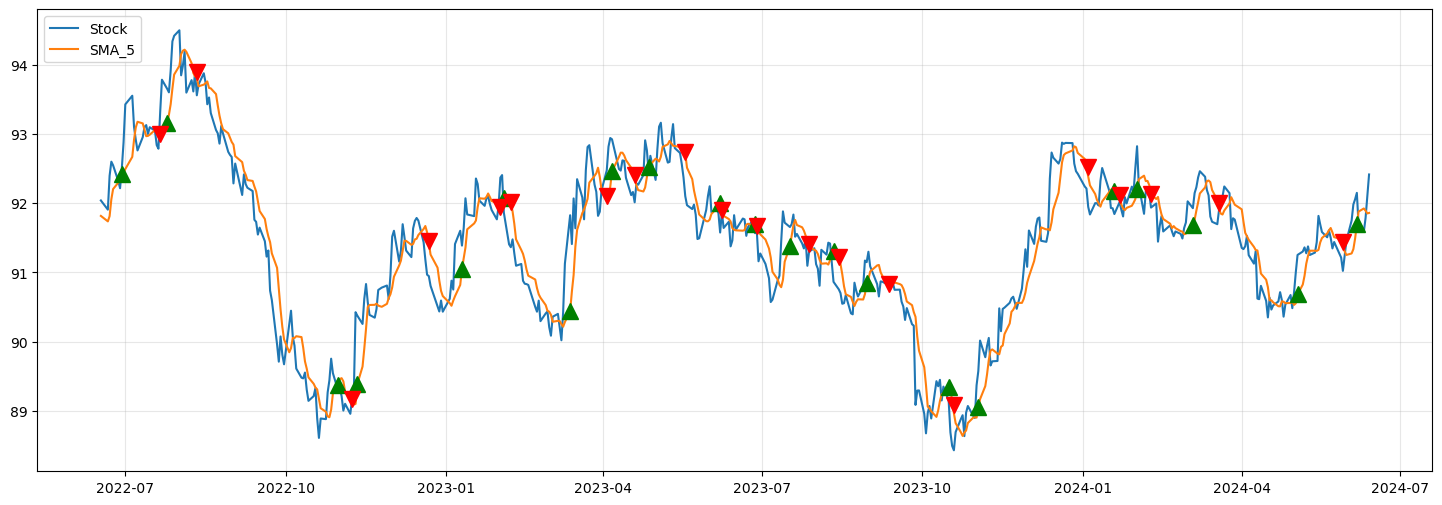

In [444]:
plt.rcParams['figure.figsize'] = 18, 6
plt.grid(True, alpha = .3)
plt.plot(data.iloc[-500:]['Close'], label = 'Stock')
plt.plot(data.iloc[-500:]['SMA_5'], label = 'SMA_5')
#plt.plot(data.iloc[-500:]['SMA_15'], label = 'SMA_15')

plt.plot(data[-500:].loc[data.entry == 2].index, data[-500:]['SMA_5'][data.entry == 2], '^',
         color = 'g', markersize = 12)
         
plt.plot(data[-500:].loc[data.entry == -2].index, data[-500:]['SMA_15'][data.entry == -2], 'v',
         color = 'r', markersize = 12)
         
plt.legend(loc=2);

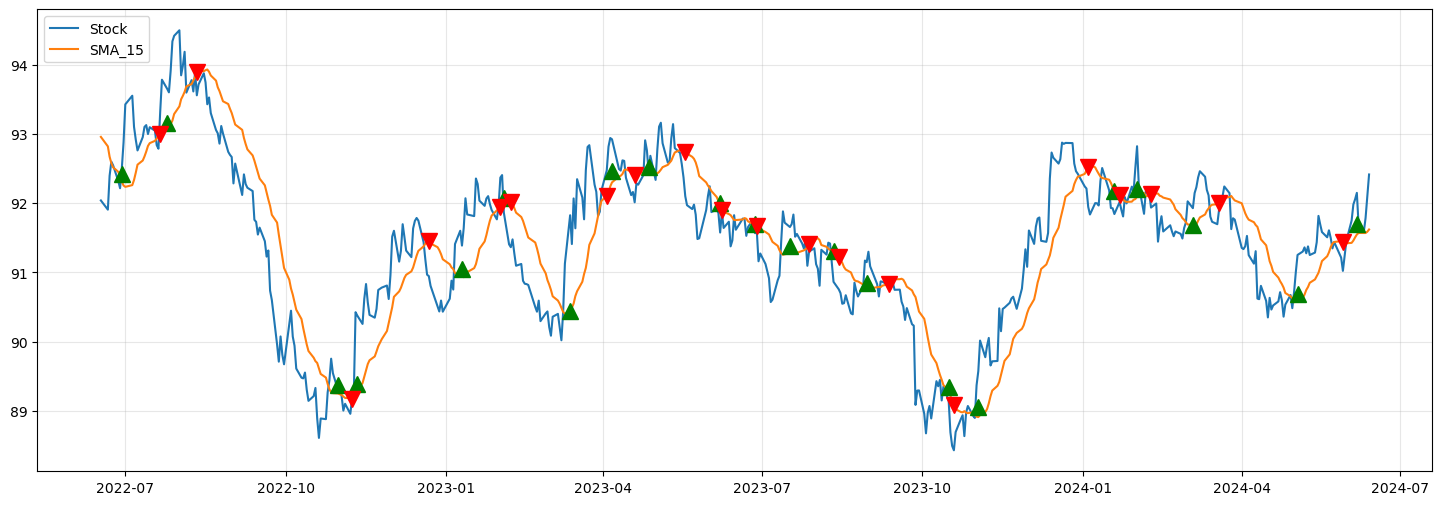

In [445]:
plt.rcParams['figure.figsize'] = 18, 6
plt.grid(True, alpha = .3)
plt.plot(data.iloc[-500:]['Close'], label = 'Stock')
#plt.plot(data.iloc[-500:]['SMA_5'], label = 'SMA_5')
plt.plot(data.iloc[-500:]['SMA_15'], label = 'SMA_15')

plt.plot(data[-500:].loc[data.entry == 2].index, data[-500:]['SMA_5'][data.entry == 2], '^',
         color = 'g', markersize = 12)
         
plt.plot(data[-500:].loc[data.entry == -2].index, data[-500:]['SMA_15'][data.entry == -2], 'v',
         color = 'r', markersize = 12)
         
plt.legend(loc=2);

## Relative Strength Index (RSI)

* Un indicador de impulso utilizado en el análisis técnico que mide la magnitud de los cambios recientes de precios para evaluar las condiciones de sobrecompra o sobreventa en el precio de una acción.
* Si el valor RSI es >70 entonces la acción está sobrecomprada y si <30 entonces está sobrevendida.
* La fórmula básica es:

**RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ]**

Reference -> [Relative Strength Index (RSI)](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/RSI)



<center><img src="https://www.fidelity.com/bin-public/060_www_fidelity_com/images/LC/RSI1_602x345.png" width="800" height="500"></center>

<center><img src="https://www.fidelity.com/bin-public/060_www_fidelity_com/images/LC/RSI2_Diverg602x345.png" width="800" height="500"></center>

El Índice de Fuerza Relativa (RSI, por sus siglas en inglés) es un indicador técnico utilizado en el análisis financiero para evaluar la fuerza y ​​la dirección de una tendencia en los precios de un activo. El RSI se basa en el concepto de que los precios tienden a corregirse después de movimientos excesivos hacia arriba o hacia abajo.

El RSI se calcula utilizando la fórmula:

$$RSI = 100 - (100 / (1 + RS))$$

Donde RS es la relación entre el promedio de los cierres de precios positivos en un período determinado y el promedio de los cierres de precios negativos en el mismo período.

El RSI varía en una escala de 0 a 100. Un valor de RSI por encima de 70 generalmente se considera una señal de que el activo está sobrecomprado y podría haber una reversión a la baja en los precios. Por otro lado, un valor de RSI por debajo de 30 se considera una señal de que el activo está sobrevendido y podría haber una reversión al alza en los precios.

El RSI también se utiliza para identificar divergencias entre el indicador y los precios. Una divergencia alcista ocurre cuando el precio forma mínimos más bajos mientras que el RSI forma mínimos más altos, lo que sugiere una posible reversión al alza. Por el contrario, una divergencia bajista ocurre cuando el precio forma máximos más altos mientras que el RSI forma máximos más bajos, lo que sugiere una posible reversión a la baja.

Es importante destacar que el RSI es solo una herramienta y debe utilizarse junto con otros indicadores y análisis para tomar decisiones de inversión informadas. Además, diferentes marcos de tiempo y activos pueden requerir ajustes en los parámetros del RSI para adaptarse a sus características específicas.

In [446]:
def RSI(df,n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp<0]=0
    pricesDown[pricesDown>0]=0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp/rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

data['RSI'] = RSI(data).fillna(0)

fig = go.Figure(go.Scatter(x=data.index,y=data.RSI,name='RSI'))
fig.show()

In [447]:
data

,Open,High,Low,Close,Adj Close,Volume,Return,Lag_Close_M,Lag_Volume_M,SMA_5,SMA_15,EMA_5,EMA_15,signal,system_return,entry,RSI
Date,,,,,,,,,,,,,,,,,
2020-10-26,99.889999,99.889999,99.860001,99.860001,95.568176,3900,-0.043266,99.940002,5685.0,99.820280,99.915427,99.862028,99.896036,-1,0.043266,NaN,NaN
2020-10-27,99.930000,99.930000,99.915001,99.915001,95.620804,710,-0.043122,99.964996,3635.0,99.814281,99.906427,99.861671,99.892538,-1,0.043122,0.0,0.000000
2020-10-28,99.910004,99.910004,99.885002,99.885002,95.592094,704,-0.043218,99.974998,3985.0,99.827861,99.898760,99.870978,99.894646,-1,0.043218,0.0,0.000000
2020-10-29,99.820000,99.820000,99.769997,99.769997,95.482033,830,-0.043458,99.945000,3312.0,99.840001,99.896427,99.873407,99.893768,-1,0.043458,0.0,0.000000
2020-10-30,99.699898,99.699898,99.699898,99.699898,95.414963,29,-0.042978,99.925003,2135.0,99.844000,99.881427,99.855615,99.882821,-1,0.042978,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07,91.879997,91.879997,91.679298,91.679298,91.679298,787,-0.002184,91.345398,941.0,91.877101,91.568220,91.688015,91.440797,1,-0.002184,0.0,51.927097
2024-06-10,91.584999,91.584999,91.584999,91.584999,91.584999,10,0.000000,91.437698,20122.0,91.921960,91.567400,91.686562,91.455703,1,0.000000,0.0,51.543619
2024-06-11,91.739899,91.800003,91.620003,91.785004,91.785004,1071,0.000492,91.212799,32762.0,91.889320,91.567640,91.669635,91.463784,1,0.000492,0.0,53.355508


## Moving Average Convergence Divergence (MACD)

* MACD utiliza dos promedios móviles exponencialmente y crea un análisis de tendencias basado en su convergencia o divergencia.
* Las señales MACD lentas y rápidas más utilizadas se basan en 26 días y 12 días respectivamente.
* El MACD se calcula restando la media móvil exponencial (EMA) de 26 períodos de la EMA de 12 períodos.
* Al igual que el RSI, el MACD activa señales técnicas **cuando cruza por encima (para comprar) o por debajo (para vender) su línea de señal**.

In [448]:
# Estimamos el promedio movil de 12 y 26 dias
data['EMA_12'] = pd.Series(data['Close'].ewm(span=12).mean())
data['EMA_26'] = pd.Series(data['Close'].ewm(span=26).mean())

# Calculamos MACD
data['MACD'] = pd.Series(data['EMA_12'] - data['EMA_26'])
data['MACD_signal'] = pd.Series(data.MACD.ewm(span=9,min_periods=9).mean())

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index,y=data.MACD,name='MACD'))
fig.add_trace(go.Scatter(x=data.index,y=data.MACD_signal,name='MACD_signal'))
fig.show()

**Existen muchos otros tipos de indicadores técnicos que utilizamos para comprender la tendencia del mercado.**

1. [10 indicadores comerciales que todo operador debería conocer](https://www.ig.com/en/trading-strategies/10-trading-indicators-every-trader-should-know-190604)
2. [Los 25 mejores indicadores técnicos que todo comerciante debería conocer](https://www.elearnmarkets.com/blog/best-25-technical-indicators/)

# Time Series Decomposition

* Podemos descomponer una serie temporal en componentes de tendencia, estacionales y de resto, como se mencionó en la sección anterior.
* La serie se puede descomponer como una combinación aditiva o multiplicativa del nivel base, tendencia, índice estacional y el residual.
* Seasonal_decompose en statsmodels se utiliza para implementar la descomposición.

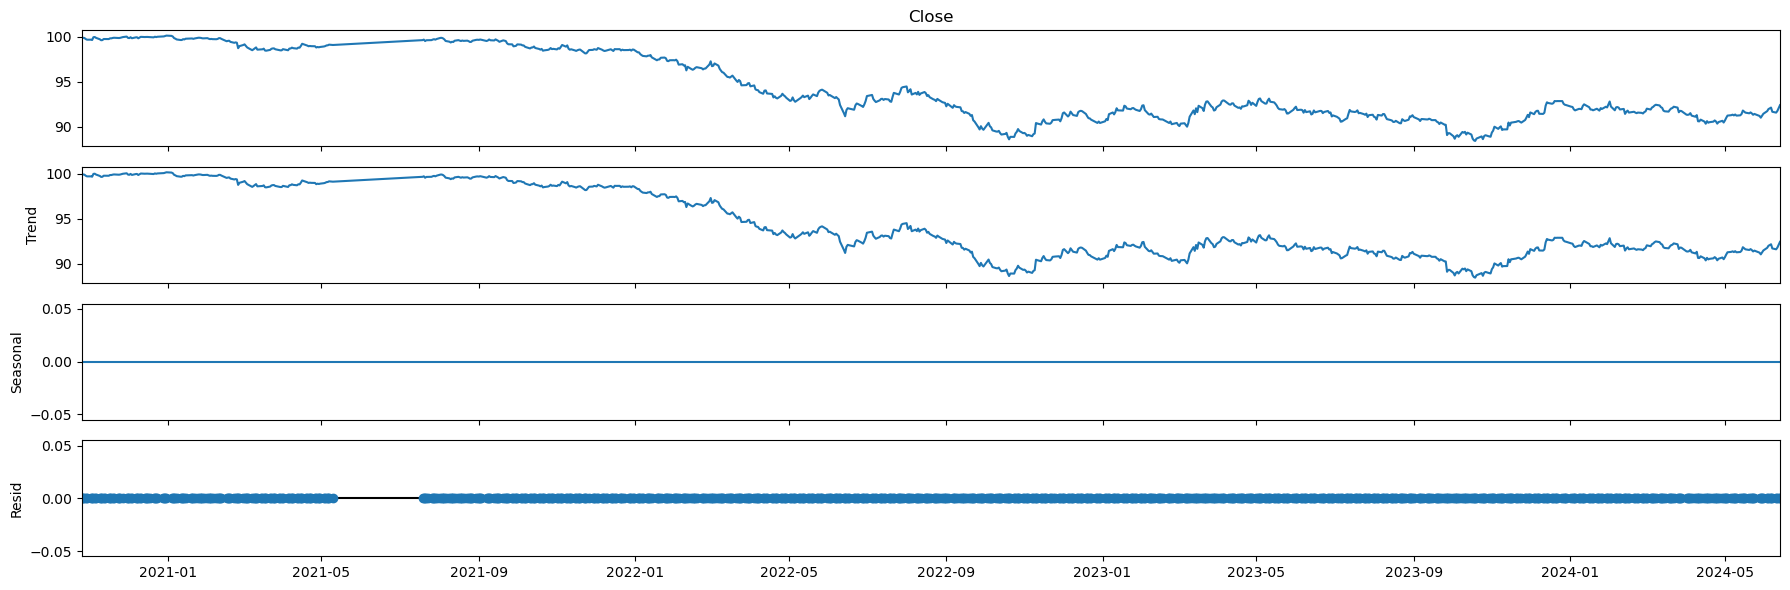

In [449]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=1) # The frequncy is daily
figure = result.plot()

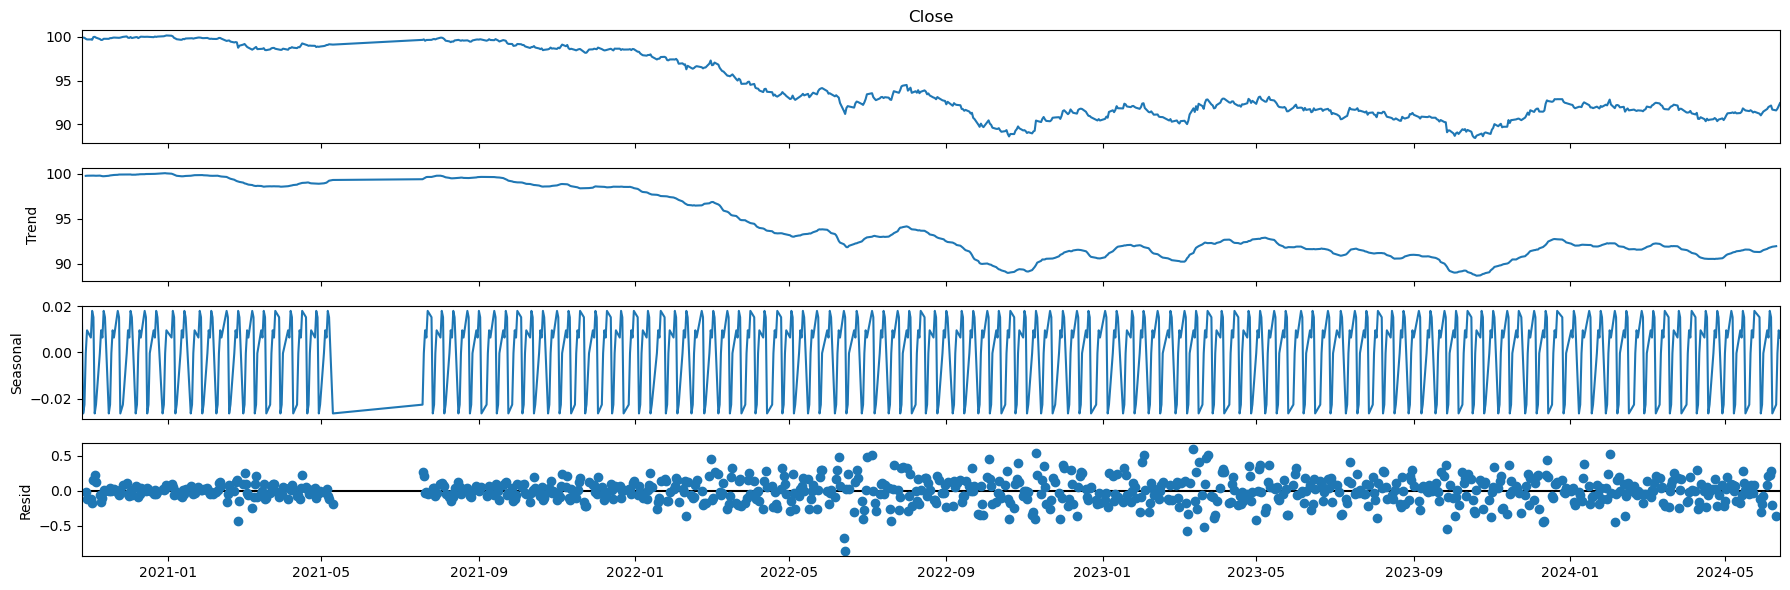

In [450]:
series = data.Close
result = seasonal_decompose(series, model='additive',period= 7) # The frequncy is yearly
figure = result.plot()

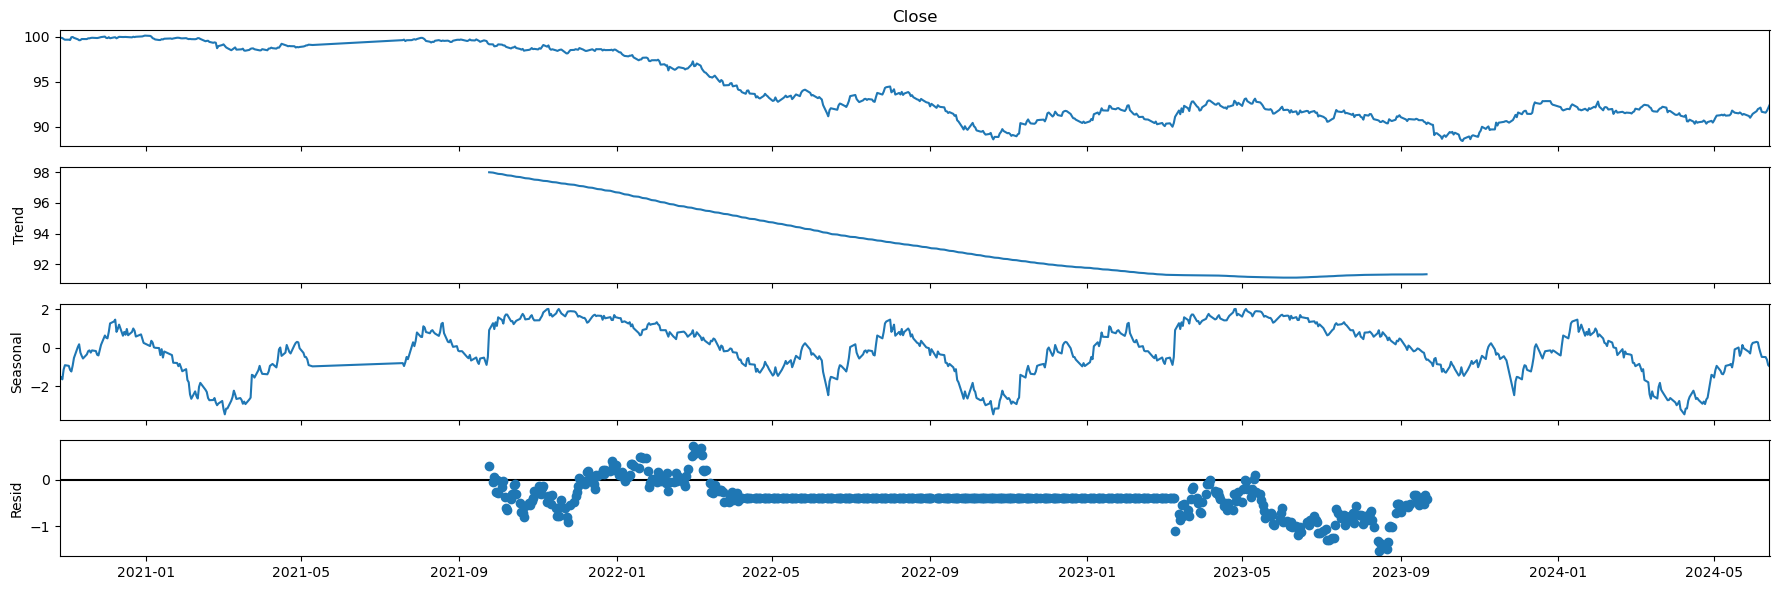

In [451]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=366) # The frequncy is yearly
figure = result.plot()



* Hay claramente una tendencia ascendente en el gráfico anterior.
* También puedes ver el cambio estacional uniforme.
* Ruido no uniforme que representa valores atípicos y valores perdidos


# Prueba estacionaria / Prueba ADF (Dickey-Fuller aumentada)

Una serie de tiempo estacionaria es aquella cuyas propiedades estadísticas, como la media, la varianza, la autocorrelación, etc., son constantes en el tiempo.

* Estacionariedad fuerte: es un proceso estocástico cuya distribución de probabilidad conjunta incondicional no cambia cuando se desplaza en el tiempo. En consecuencia, parámetros como la media y la varianza tampoco cambian con el tiempo.
* Estacionariedad débil: es un proceso donde la media, la varianza y la autocorrelación son constantes a lo largo del tiempo.

La estacionariedad es importante ya que las series no estacionarias que dependen del tiempo tienen demasiados parámetros que tener en cuenta al modelar la serie temporal. El método diff() puede convertir fácilmente una serie no estacionaria en una serie estacionaria.

* Primero, debemos verificar si una serie es estacionaria o no porque el análisis de series de tiempo solo funciona con datos estacionarios.
* La prueba de Dickey-Fuller es una de las pruebas estadísticas más populares.
* Puede usarse para determinar la presencia de raíz unitaria en la serie y, por lo tanto, ayudarnos a comprender si la serie es estacionaria o no. La hipótesis nula y alternativa de esta prueba es:

**Hipótesis nula**: La serie tiene raíz unitaria (valor de a =1)

**Hipótesis alternativa**: La serie no tiene raíz unitaria.

Si no rechazamos la hipótesis nula, podemos decir que la serie no es estacionaria. Esto significa que la serie puede ser lineal o estacionaria en diferencias.

**Si tanto la media como la desviación estándar son líneas planas (media constante y varianza constante), la serie se vuelve estacionaria.**

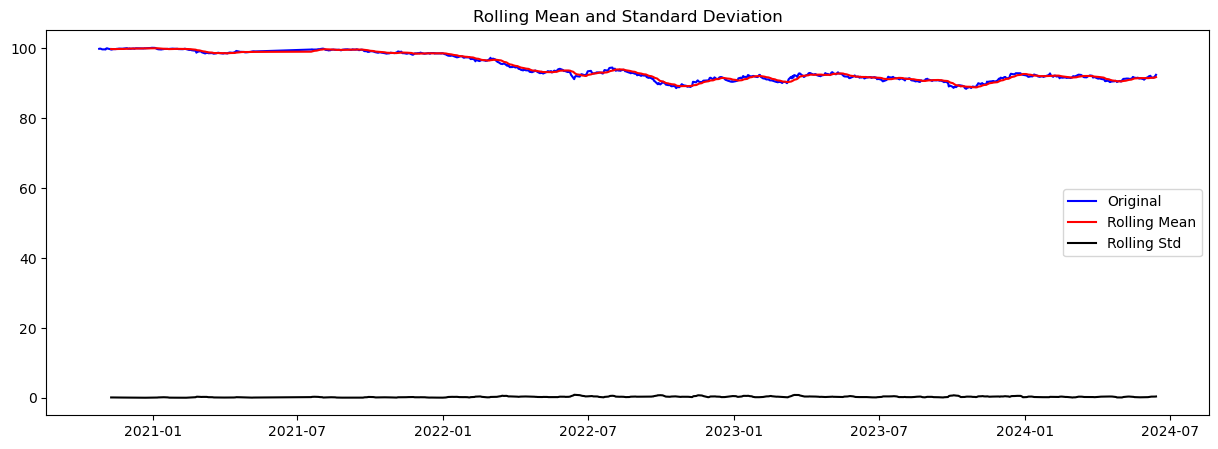

Results of dickey fuller test
Test Statistics                 -1.495253
p-value                          0.535858
No. of lags used                 2.000000
Number of observations used    864.000000
dtype: float64


In [452]:
#Test for staionarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(data['Close'])    



A través del gráfico anterior, podemos ver la media y la desviación estándar crecientes y, por lo tanto, **nuestra serie no es estacionaria**.

Vemos que el valor p es mayor que 0,05 por lo que no podemos rechazar la hipótesis nula. Además, las estadísticas de la prueba son mayores que los valores críticos. entonces los datos no son estacionarios.

### DIFERENCIACIÓN:

 La diferenciación es una transformación de datos popular y ampliamente utilizada para hacer que los datos de series temporales sean estacionarios.

 La diferenciación puede ayudar a estabilizar la media de una serie temporal eliminando cambios en el nivel de una serie temporal y, por lo tanto, eliminando (o reduciendo) la tendencia y la estacionalidad.

 La diferenciación desplaza UNA/MÁS fila hacia abajo.

[Source Video](https://www.youtube.com/watch?v=nPYPyh20gGo)

In [453]:
data['Stocks First Difference']=data['Close']-data['Close'].shift(1)
data['Stocks Seasonal Difference']=data['Close']-data['Close'].shift(12)
data['Stocks Seasonal+Daily Difference']=data['Stocks Seasonal Difference']-data['Stocks Seasonal Difference'].shift(1)

In [454]:
adft = adfuller(data['Stocks First Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Estadísticas de prueba','valor p','No. de rezagos utilizados','Número de observaciones utilizadas'])
print(output)

Estadísticas de prueba                -22.041157
valor p                                 0.000000
No. de rezagos utilizados               1.000000
Número de observaciones utilizadas    864.000000
dtype: float64


In [455]:
adft = adfuller(data['Stocks Seasonal Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Estadísticas de prueba','valor p','No. de rezagos utilizados','Número de observaciones utilizadas'])
print(output)

Estadísticas de prueba                 -4.983723
valor p                                 0.000024
No. de rezagos utilizados              13.000000
Número de observaciones utilizadas    841.000000
dtype: float64


In [456]:
adft = adfuller(data['Stocks Seasonal+Daily Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Estadísticas de prueba','valor p','No. de rezagos utilizados','Número de observaciones utilizadas'])
print(output)

Estadísticas de prueba               -1.322144e+01
valor p                               9.998867e-25
No. de rezagos utilizados             1.100000e+01
Número de observaciones utilizadas    8.420000e+02
dtype: float64


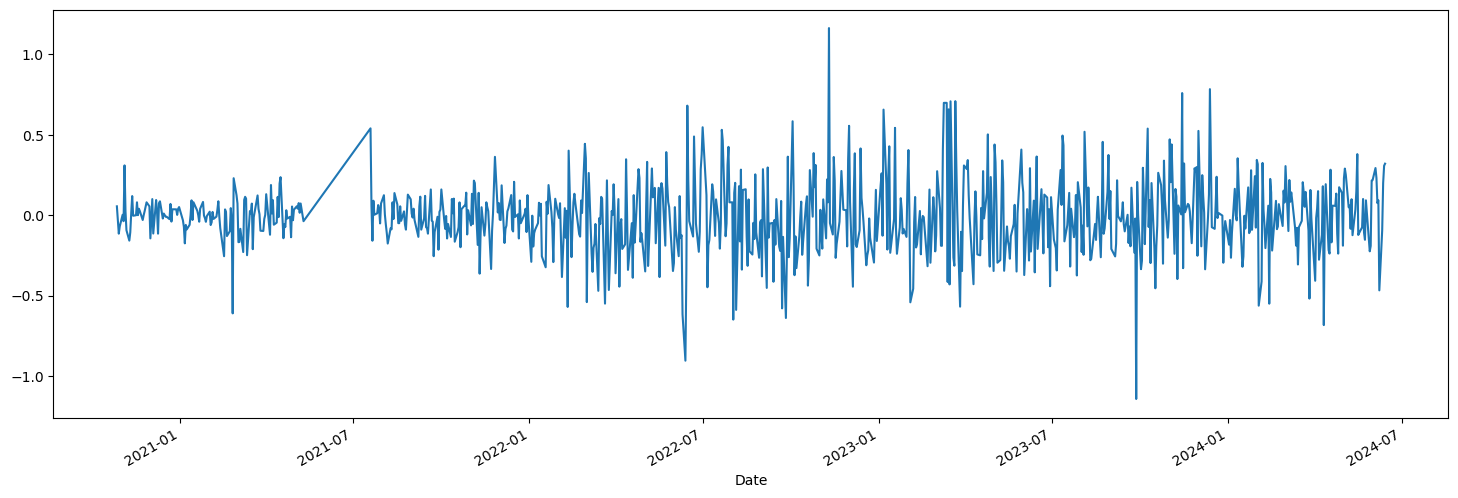

In [457]:
data['Stocks First Difference'].plot();


AHORA NUESTROS DATOS SON ESTACIONARIOS.

# ARIMA Model

* Los modelos de media móvil integrada autorregresiva (ARIMA) predicen valores futuros basándose en valores pasados.
* ARIMA utiliza promedios móviles rezagados para suavizar los datos de series temporales.
* Se utilizan ampliamente en análisis técnicos para pronosticar precios futuros de valores.

 Según el nombre, podemos dividir el modelo en componentes más pequeños de la siguiente manera:
1. **AR**: un modelo AutoregRegressive que representa un tipo de proceso aleatorio. La salida del modelo depende linealmente de su propio valor anterior, es decir, una cierta cantidad de puntos de datos rezagados o la cantidad de observaciones pasadas.
1. **I**: integrado aquí significa el paso de diferenciación para generar datos de series de tiempo estacionarias, es decir, eliminar los componentes estacionales y de tendencia.
1. **MA**: un modelo de media móvil cuyo resultado depende linealmente de las observaciones actuales y pasadas de un término estocástico.

El modelo ARIMA generalmente se indica como **ARIMA(p, d, q)** y los parámetros p, d, q se definen de la siguiente manera:

1. **p**: el orden de retraso o el número de retrasos del modelo autorregresivo AR(p)
1. **d**: grado de diferenciación o número de veces que los datos se han restado con el valor pasado
1. **q**: el orden del modelo de media móvil MA(q)

Es hora de elegir los parámetros p,q,d para el modelo ARIMA. Los valores de p, d y q se eligen observando los gráficos de ACF y PACF, pero ahora usaremos Auto ARIMA para obtener los mejores parámetros sin siquiera trazar gráficos de ACF y PACF.

[Source video](https://www.youtube.com/watch?v=xbqY485yslI&t=668s)


**Auto ARIMA**: Descubre automáticamente el orden óptimo para un modelo ARIMA.

La función auto_arima busca identificar los parámetros más óptimos para un modelo ARIMA y devuelve un modelo ARIMA ajustado. Esta función se basa en la función R de uso común, Forecast::auto.arima.


# Autocorrelation and Partial Autocorrelation

* Autocorrelación: la función de autocorrelación (ACF) mide cómo se correlaciona una serie consigo misma en diferentes retrasos.

* Autocorrelación parcial: la función de autocorrelación parcial se puede interpretar como una regresión de la serie frente a sus desfases pasados. Los términos se pueden interpretar de la misma manera que una regresión lineal estándar, es decir, la contribución de un cambio en ese rezago particular mientras se mantienen constantes los demás.


In [458]:
import statsmodels.api as sm
acf_values = sm.tsa.acf(data["Close"])
acf_values

array([1.        , 0.99655392, 0.99297692, 0.98962805, 0.98639569,
       0.98301534, 0.97967325, 0.97643942, 0.97289546, 0.96929763,
       0.96548837, 0.96152634, 0.95759295, 0.95397752, 0.95027212,
       0.94637477, 0.94249434, 0.93873318, 0.93466006, 0.9305423 ,
       0.92639795, 0.9222278 , 0.91798022, 0.91388577, 0.90996107,
       0.90602808, 0.90219712, 0.89832333, 0.89440784, 0.8903435 ])

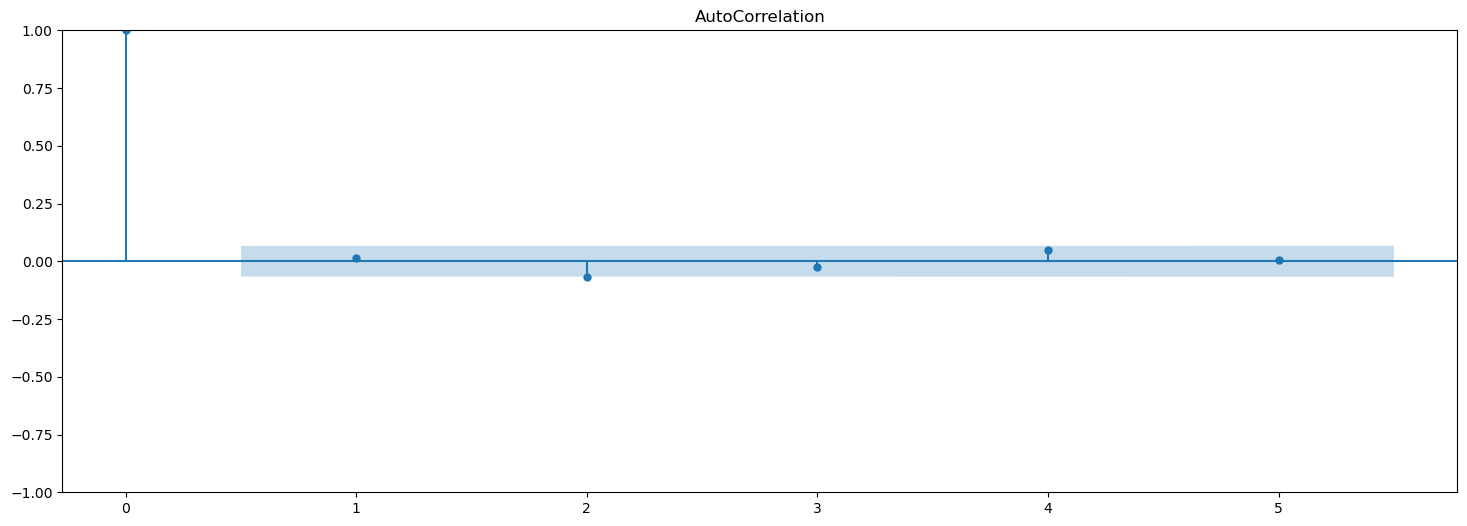

In [459]:
plot_acf(data["Stocks First Difference"].dropna(),lags=5,title="AutoCorrelation")
plt.show()

# Como todos los rezagos son cercanos a 1 o al menos mayores que el intervalo de confianza, son estadísticamente significativos.
# Puedes ver... la región azul divergente es el intervalo de confianza

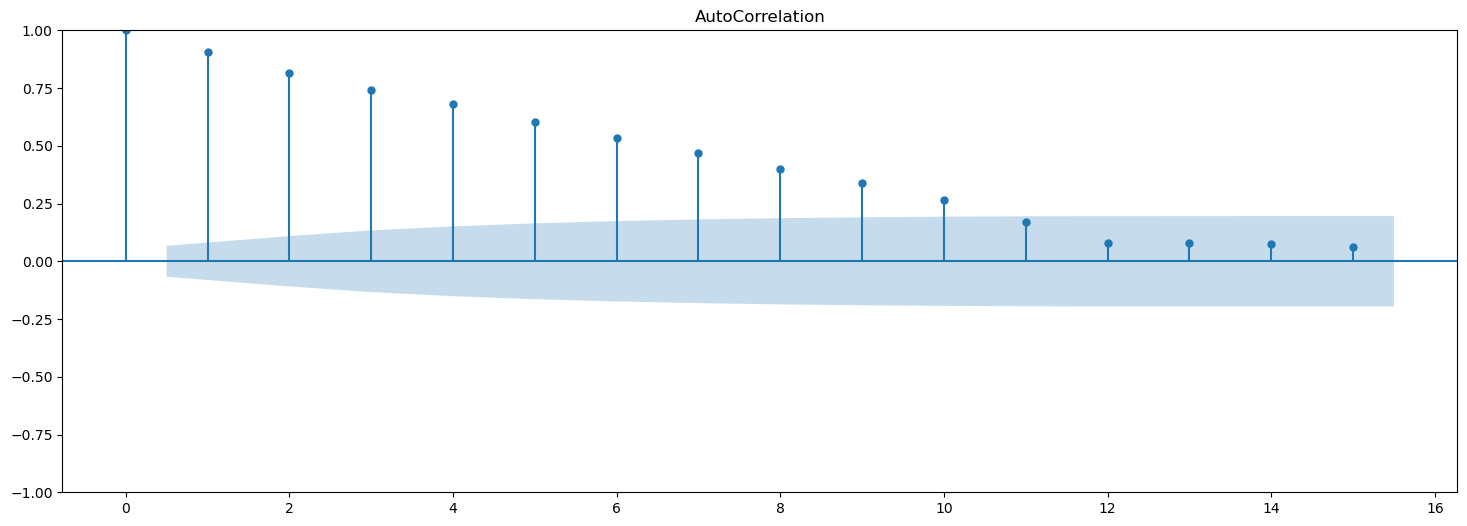

In [460]:
plot_acf(data["Stocks Seasonal Difference"].dropna(),lags=15,title="AutoCorrelation")
plt.show()

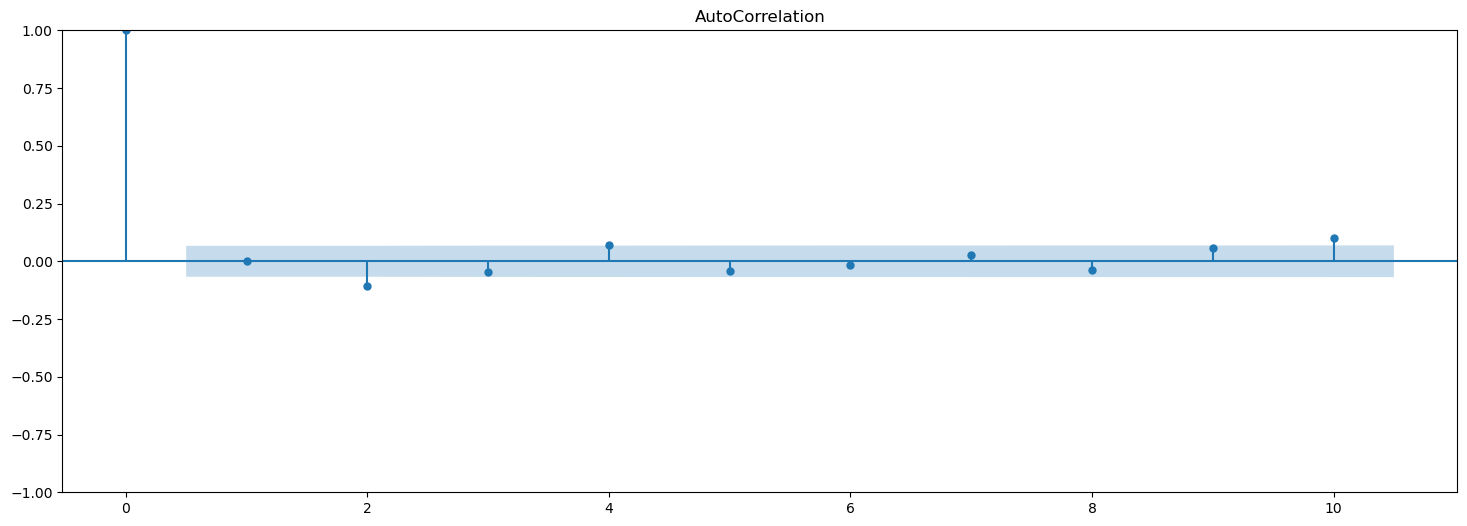

In [461]:
plot_acf(data["Stocks Seasonal+Daily Difference"].dropna(),lags=10,title="AutoCorrelation")
plt.show()

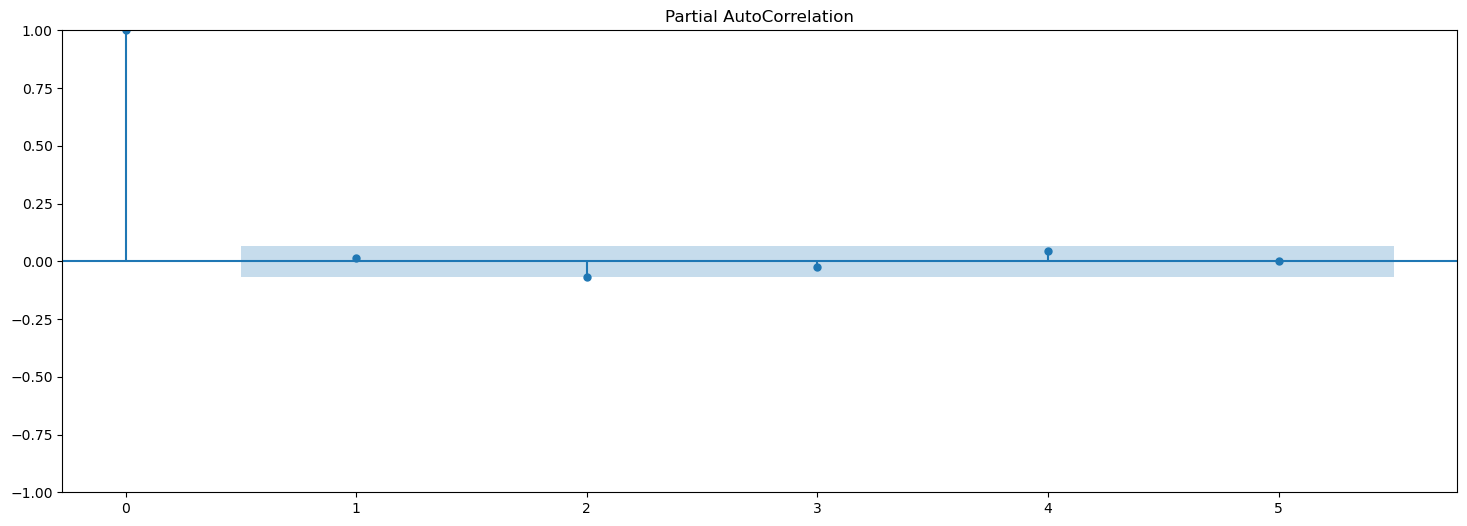

In [462]:
plot_pacf(data["Stocks First Difference"].dropna(),lags=5,title="Partial AutoCorrelation")
plt.show()

# Here, only 0th and 1st are statistically significant.

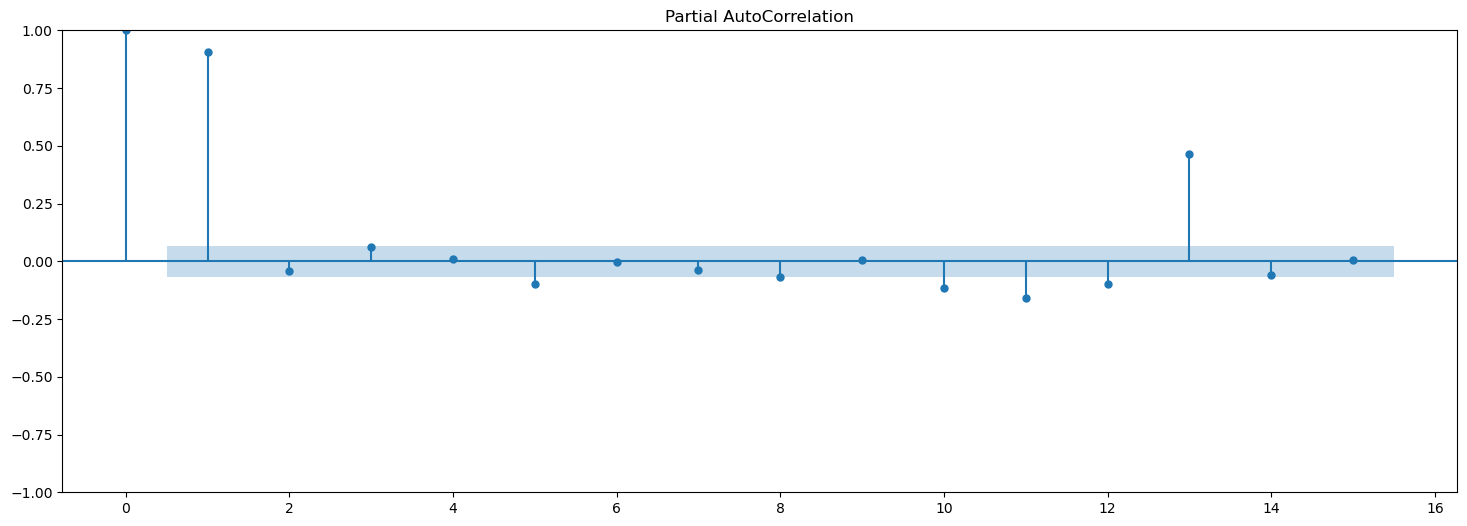

In [463]:
plot_pacf(data["Stocks Seasonal Difference"].dropna(),lags=15,title="Partial AutoCorrelation")
plt.show()

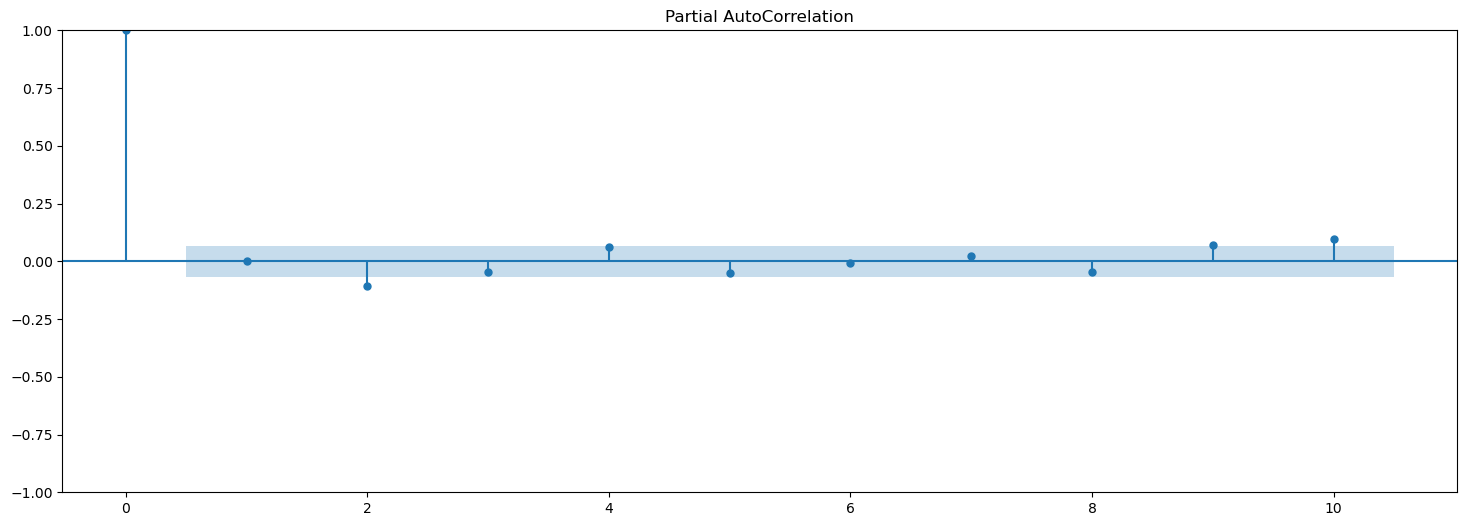

In [464]:
plot_pacf(data["Stocks Seasonal+Daily Difference"].dropna(),lags=10,title="Partial AutoCorrelation")
plt.show()


Aquí estos dos gráficos te ayudarán a encontrar los valores de p y q.

 El gráfico de autocorrelación parcial es para el valor p.
 Gráfico de autocorrelación para el valor q.


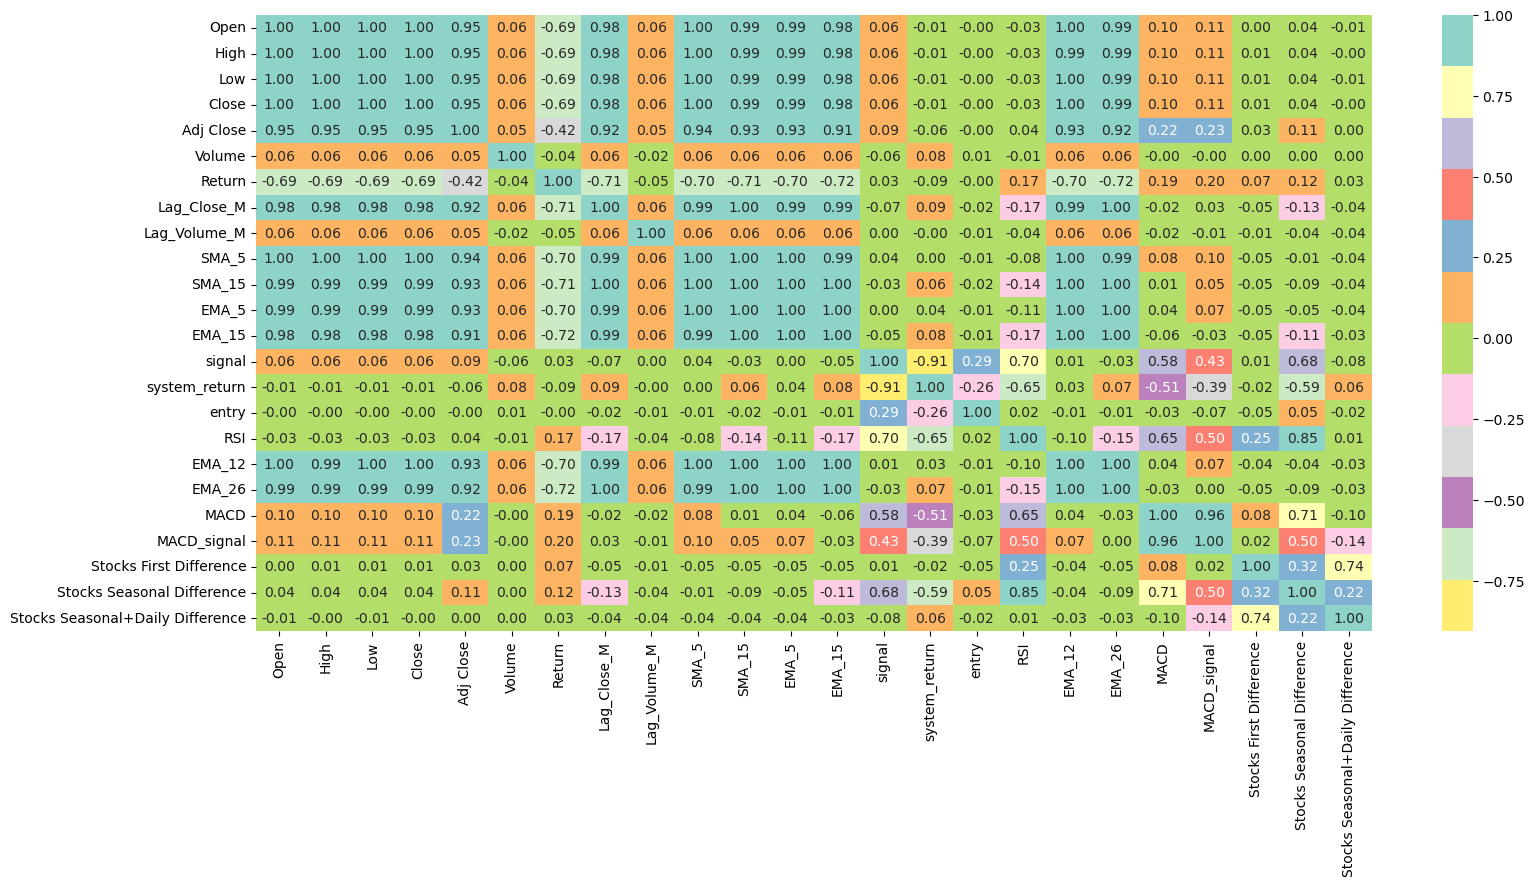

In [465]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(), annot=True, cmap="Set3_r",  fmt='.02f',)
plt.show()

# Forecasting

### Split the data


Nota importante sobre la validación cruzada

Para medir el rendimiento de nuestro modelo de pronóstico, normalmente queremos dividir la serie de tiempo en un período de entrenamiento y un período de validación. Esto se llama partición fija.

 Entrenaremos nuestro modelo en el período de entrenamiento, lo evaluaremos en el período de validación. Aquí es donde puede experimentar para encontrar la arquitectura adecuada para el entrenamiento. Y trabaje en él y en sus hiperparámetros, hasta que obtenga el rendimiento deseado, medido utilizando el conjunto de validación. A menudo, una vez que haya hecho eso, puede volver a entrenar utilizando los datos de entrenamiento y validación. Y luego probar en el período de prueba (o pronóstico) para ver si su modelo funcionará igual de bien.

 Y si es así, entonces podría tomar la inusual medida de volver a capacitarse, utilizando también los datos de la prueba. ¿Pero por qué harías eso? Bueno, es porque los datos de prueba son los datos más cercanos que tienes al momento actual. Y como tal, suele ser la señal más fuerte para determinar los valores futuros. Si su modelo no está entrenado con esos datos también, es posible que no sea óptimo.

Aquí, optaremos por una validación basada en retención.

Ahora vamos a crear un modelo ARIMA y lo entrenaremos con el precio de cierre de la acción en los datos del tren. Entonces, **dividamos los datos en tren y conjunto de prueba** y visualicémoslos.


* **tren**: Datos de 1987 al 31 de diciembre de 2018.
* **válido**: Datos del 1 de enero de 2019 a 2020.

In [466]:
sipi = data.copy()
sipi = sipi.reset_index()

In [467]:
sipi.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return',
       'Lag_Close_M', 'Lag_Volume_M', 'SMA_5', 'SMA_15', 'EMA_5', 'EMA_15',
       'signal', 'system_return', 'entry', 'RSI', 'EMA_12', 'EMA_26', 'MACD',
       'MACD_signal', 'Stocks First Difference', 'Stocks Seasonal Difference',
       'Stocks Seasonal+Daily Difference'],
      dtype='object')

In [468]:

ohe = sipi[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'SMA_5', 'SMA_15', 'EMA_5' ]]
ohe = ohe.rename(columns= {"Date":"ds", "Close": "y"})
ohe["unique_id"] = 1
ohe.head()

,ds,Open,High,Low,y,Adj Close,SMA_5,SMA_15,EMA_5,unique_id
0,2020-10-26,99.889999,99.889999,99.860001,99.860001,95.568176,99.820280,99.915427,99.862028,1
1,2020-10-27,99.930000,99.930000,99.915001,99.915001,95.620804,99.814281,99.906427,99.861671,1
2,2020-10-28,99.910004,99.910004,99.885002,99.885002,95.592094,99.827861,99.898760,99.870978,1
3,2020-10-29,99.820000,99.820000,99.769997,99.769997,95.482033,99.840001,99.896427,99.873407,1
4,2020-10-30,99.699898,99.699898,99.699898,99.699898,95.414963,99.844000,99.881427,99.855615,1


In [469]:
train = ohe[ohe.ds<='2024-04-19'] 
test = ohe[(ohe['ds'] > '2024-04-19')]

test.drop("y",axis=1, inplace=True)
train.shape, test.shape

((829, 10), (38, 9))

In [470]:
train.head()

,ds,Open,High,Low,y,Adj Close,SMA_5,SMA_15,EMA_5,unique_id
0,2020-10-26,99.889999,99.889999,99.860001,99.860001,95.568176,99.820280,99.915427,99.862028,1
1,2020-10-27,99.930000,99.930000,99.915001,99.915001,95.620804,99.814281,99.906427,99.861671,1
2,2020-10-28,99.910004,99.910004,99.885002,99.885002,95.592094,99.827861,99.898760,99.870978,1
3,2020-10-29,99.820000,99.820000,99.769997,99.769997,95.482033,99.840001,99.896427,99.873407,1
4,2020-10-30,99.699898,99.699898,99.699898,99.699898,95.414963,99.844000,99.881427,99.855615,1


In [471]:
test.head() # Exogenas para la prueba del modelo

,ds,Open,High,Low,Adj Close,SMA_5,SMA_15,EMA_5,unique_id
829,2024-04-22,90.489998,90.579498,90.489998,90.579498,90.510480,90.923873,90.765160,1
830,2024-04-23,90.660202,90.830002,90.629997,90.713699,90.508820,90.872320,90.734216,1
831,2024-04-24,90.480103,90.599197,90.480103,90.599197,90.581799,90.830893,90.730797,1
832,2024-04-25,90.360001,90.375702,90.330002,90.360001,90.575299,90.779106,90.708864,1
833,2024-04-26,90.533798,90.533798,90.533798,90.533798,90.554799,90.701413,90.650720,1


# Modelando con StatsForecast

In [472]:
# pip install statsforecast

In [473]:
from statsforecast import StatsForecast
from statsforecast.models import SklearnModel
from statsforecast.models import AutoARIMA
from statsforecast.models import SeasonalNaive

from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from utilsforecast.plotting import plot_series

- ## Seleccionamos los modelos

In [474]:
season_length = 7 

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          SklearnModel(Lasso()),
          SklearnModel(Ridge()),
          SklearnModel(RandomForestRegressor())
          ]

- ## Construir el Modelo

In [475]:
# Instantiate StatsForecast class as sf
sf = StatsForecast( models=models,
                   freq='B', 
                   fallback_model = SeasonalNaive(season_length=season_length),
                   n_jobs=-1)

- ## Entrenar el modelo

In [476]:
from statsforecast.utils import ConformalIntervals

intervals = ConformalIntervals(h = 32, n_windows = 5)

# fit the models
sf.fit(df = train,  prediction_intervals=intervals)

StatsForecast(models=[AutoARIMA,SeasonalNaive,Lasso,Ridge,RandomForestRegressor])

- ## Forecasting del precio del `Bitcoin`

In [477]:
preds = sf.forecast(
    df= train,
    h = 38, #32
    X_df = test, # Variables exogenas 
    prediction_intervals=ConformalIntervals(n_windows = 5, h= 32),
    level=[95],
)
preds.head()

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95,SeasonalNaive,SeasonalNaive-lo-95,SeasonalNaive-hi-95,Lasso,Lasso-lo-95,Lasso-hi-95,Ridge,Ridge-lo-95,Ridge-hi-95,RandomForestRegressor,RandomForestRegressor-lo-95,RandomForestRegressor-hi-95
unique_id,,,,,,,,,,,,,,,,
1,2024-04-22,90.612000,87.776390,93.447609,90.612000,87.776390,93.447609,90.612000,87.776390,93.447609,90.612000,87.776390,93.447609,90.612000,87.776390,93.447609
1,2024-04-23,90.804703,87.969093,93.640312,90.804703,87.969093,93.640312,90.804703,87.969093,93.640312,90.804703,87.969093,93.640312,90.804703,87.969093,93.640312
1,2024-04-24,90.587799,87.752190,93.423409,90.587799,87.752190,93.423409,90.587799,87.752190,93.423409,90.587799,87.752190,93.423409,90.587799,87.752190,93.423409
1,2024-04-25,90.348801,87.513191,93.184410,90.348801,87.513191,93.184410,90.348801,87.513191,93.184410,90.348801,87.513191,93.184410,90.348801,87.513191,93.184410
1,2024-04-26,90.631699,87.796089,93.467308,90.631699,87.796089,93.467308,90.631699,87.796089,93.467308,90.631699,87.796089,93.467308,90.631699,87.796089,93.467308


In [478]:
preds.tail()

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95,SeasonalNaive,SeasonalNaive-lo-95,SeasonalNaive-hi-95,Lasso,Lasso-lo-95,Lasso-hi-95,Ridge,Ridge-lo-95,Ridge-hi-95,RandomForestRegressor,RandomForestRegressor-lo-95,RandomForestRegressor-hi-95
unique_id,,,,,,,,,,,,,,,,
1,2024-06-06,90.462502,87.626892,93.298111,90.462502,87.626892,93.298111,90.462502,87.626892,93.298111,90.462502,87.626892,93.298111,90.462502,87.626892,93.298111
1,2024-06-07,90.521599,87.685989,93.357208,90.521599,87.685989,93.357208,90.521599,87.685989,93.357208,90.521599,87.685989,93.357208,90.521599,87.685989,93.357208
1,2024-06-10,90.612000,87.776390,93.447609,90.612000,87.776390,93.447609,90.612000,87.776390,93.447609,90.612000,87.776390,93.447609,90.612000,87.776390,93.447609
1,2024-06-11,90.804703,87.969093,93.640312,90.804703,87.969093,93.640312,90.804703,87.969093,93.640312,90.804703,87.969093,93.640312,90.804703,87.969093,93.640312
1,2024-06-12,90.587799,87.752190,93.423409,90.587799,87.752190,93.423409,90.587799,87.752190,93.423409,90.587799,87.752190,93.423409,90.587799,87.752190,93.423409


In [479]:
plot_series(ohe,  preds.reset_index(),max_insample_length= 100, engine= "plotly")

In [480]:
plot_series(ohe,  preds.reset_index(),max_insample_length= 100, engine= "plotly", models = ["AutoARIMA"])

In [481]:
plot_series(ohe,  preds.reset_index(),max_insample_length= 100, engine= "plotly", models = ["Lasso"])

In [482]:
plot_series(ohe,  preds.reset_index(),max_insample_length= 100, engine= "plotly", models = ["Ridge"])

In [483]:
plot_series(ohe,  preds.reset_index(),max_insample_length= 100, engine= "plotly", models = ["RandomForestRegressor"])

## Evaluamos el modelo

Evaluamos los modelos usado usando el `Cross Validation` con diferentes tipo de metricas

In [484]:
cv_sf = sf.cross_validation(df = train, h = 32, n_windows = 5)

In [485]:
cv_sf.head()

,ds,cutoff,y,AutoARIMA,SeasonalNaive,Lasso,Ridge,RandomForestRegressor
unique_id,,,,,,,,
1,2024-02-29,2024-02-28,91.719704,91.715942,91.679100,91.924614,91.728806,91.749939
1,2024-03-01,2024-02-28,92.025002,92.022423,91.591904,92.216370,92.036354,92.045883
1,2024-03-04,2024-02-28,91.926300,91.926888,91.521301,92.141571,91.947372,91.960388
1,2024-03-05,2024-02-28,92.144997,92.124115,91.589897,92.247139,92.117905,92.105965
1,2024-03-06,2024-02-28,92.228401,92.243843,91.555298,92.466965,92.273582,92.328377


In [486]:
# pip install datasetsforecast

In [487]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [488]:
evaluation_df_sf_rmse = evaluate_cross_validation(cv_sf, rmse)
evaluation_df_sf_rmse

,AutoARIMA,SeasonalNaive,Lasso,Ridge,RandomForestRegressor,best_model
unique_id,,,,,,
1,0.022486,0.623989,0.209588,0.028538,0.045777,AutoARIMA


In [489]:
evaluate_cross_validation(cv_sf, mape)

,AutoARIMA,SeasonalNaive,Lasso,Ridge,RandomForestRegressor,best_model
unique_id,,,,,,
1,0.013808,0.563787,0.215985,0.025188,0.034419,AutoARIMA


In [490]:
evaluate_cross_validation(cv_sf, mae)

,AutoARIMA,SeasonalNaive,Lasso,Ridge,RandomForestRegressor,best_model
unique_id,,,,,,
1,0.01262,0.51535,0.197543,0.02305,0.031523,AutoARIMA
